# SmartDynamic: Data Exploration and Analysis

This notebook explores the datasets for the SmartDynamic pricing system. We'll analyze product pricing data, customer segments, competitor pricing, and weather/event data to understand patterns that can influence dynamic pricing strategies.

## Objectives
- Load and examine the structure of our datasets
- Visualize price trends and sales velocity
- Calculate price elasticity
- Analyze competitor pricing patterns
- Explore correlations between weather events and sales
- Investigate customer segmentation

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import os
import sys

# Configure matplotlib for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Add parent directory to path to enable imports from src
sys.path.append('..')  

## 1. Load and Explore Product Data

Let's load our product dataset and examine its structure.

In [2]:
# Load product data
product_data_path = '../data/sample_product_data.csv'
products_df = pd.read_csv(product_data_path)

# Display basic information
print(f"Dataset shape: {products_df.shape}")
print("\nFirst few rows:")
display(products_df.head())

# Summary statistics
print("\nSummary statistics:")
display(products_df.describe())

# Check data types and missing values
print("\nData types and missing values:")
display(pd.DataFrame({
    'Data Type': products_df.dtypes,
    'Missing Values': products_df.isnull().sum(),
    'Missing %': round(products_df.isnull().sum() / len(products_df) * 100, 2)
}
))

Dataset shape: (35, 13)

First few rows:


,product_id,category,brand,cost,base_price,current_price,competitor_price_1,competitor_price_2,inventory_level,sales_velocity,seasonality_factor,promotion_flag,date
0,P001,Electronics,TechBrand,350.0,499.99,499.99,519.99,489.99,120,5.2,1.0,0,2025-01-01
1,P001,Electronics,TechBrand,350.0,499.99,489.99,509.99,479.99,115,6.1,1.0,0,2025-01-02
2,P001,Electronics,TechBrand,350.0,499.99,489.99,509.99,479.99,109,6.0,1.0,0,2025-01-03
3,P001,Electronics,TechBrand,350.0,499.99,479.99,499.99,479.99,103,7.2,1.0,0,2025-01-04
4,P001,Electronics,TechBrand,350.0,499.99,479.99,499.99,469.99,96,7.0,1.0,0,2025-01-05



Summary statistics:


,cost,base_price,current_price,competitor_price_1,competitor_price_2,inventory_level,sales_velocity,seasonality_factor,promotion_flag
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,191.428571,288.561429,278.304286,289.704286,277.190000,84.628571,6.931429,1.028571,0.228571
std,144.015785,193.377760,187.894177,192.904818,183.847091,55.299232,2.429932,0.117752,0.426043
min,25.000000,59.990000,54.990000,59.990000,57.990000,13.000000,3.000000,0.900000,0.000000
25%,25.000000,59.990000,59.990000,64.990000,61.490000,38.500000,4.950000,0.900000,0.000000
50%,120.000000,199.990000,199.990000,209.990000,199.990000,71.000000,7.000000,1.000000,0.000000
75%,350.000000,499.990000,479.990000,499.990000,474.990000,120.500000,9.000000,1.200000,0.000000
max,350.000000,499.990000,499.990000,519.990000,489.990000,200.000000,11.200000,1.200000,1.000000



Data types and missing values:


,Data Type,Missing Values,Missing %
product_id,object,0,0.0
category,object,0,0.0
brand,object,0,0.0
cost,float64,0,0.0
base_price,float64,0,0.0
current_price,float64,0,0.0
competitor_price_1,float64,0,0.0
competitor_price_2,float64,0,0.0
inventory_level,int64,0,0.0
sales_velocity,float64,0,0.0


## 2. Visualize Price Trends and Sales Velocity

Let's visualize how prices change over time and how they relate to sales velocity.

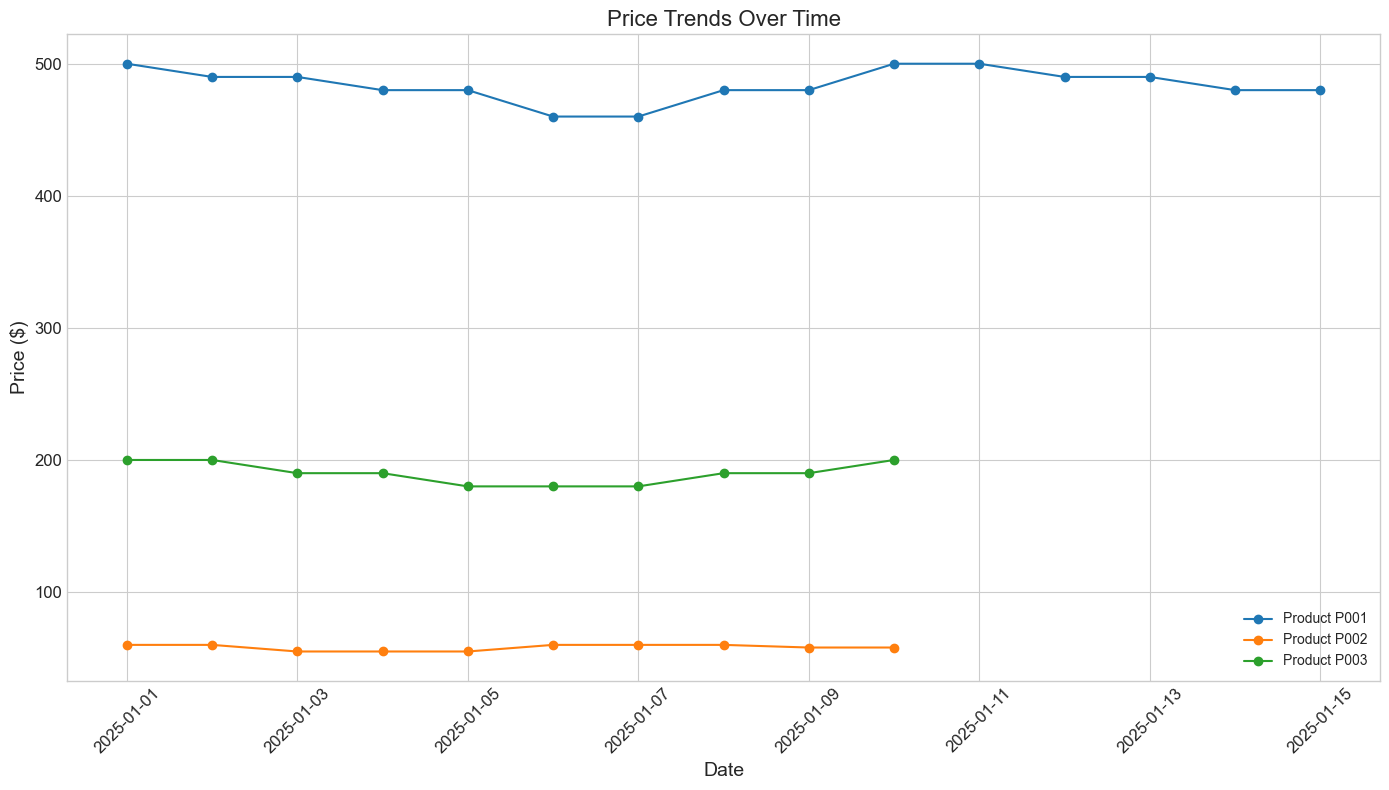

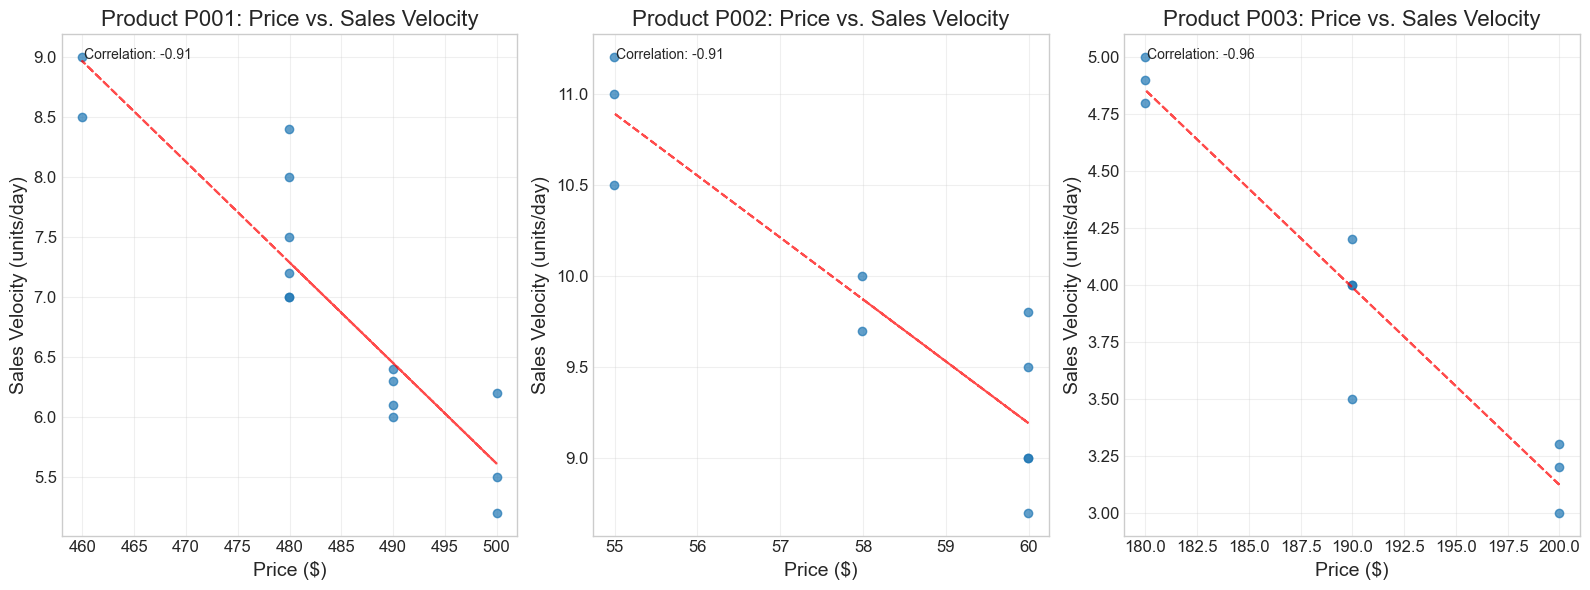

In [3]:
# Convert date to datetime
products_df['date'] = pd.to_datetime(products_df['date'])

# Plotting price trends for each product
plt.figure(figsize=(14, 8))
for product_id in products_df['product_id'].unique():
    product_data = products_df[products_df['product_id'] == product_id]
    plt.plot(product_data['date'], product_data['current_price'], marker='o', label=f'Product {product_id}')

plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create interactive plot with Plotly
fig = px.line(products_df, x='date', y='current_price', color='product_id',
             title='Product Price Trends', markers=True,
             labels={'current_price': 'Current Price ($)', 'date': 'Date', 'product_id': 'Product ID'})
fig.update_layout(hovermode="x unified")
fig.show()

# Visualize relationship between price and sales velocity
plt.figure(figsize=(16, 6))
for i, product_id in enumerate(products_df['product_id'].unique(), 1):
    plt.subplot(1, 3, i)
    product_data = products_df[products_df['product_id'] == product_id]
    
    plt.scatter(product_data['current_price'], product_data['sales_velocity'], alpha=0.7)
    plt.title(f'Product {product_id}: Price vs. Sales Velocity')
    plt.xlabel('Price ($)')
    plt.ylabel('Sales Velocity (units/day)')
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(product_data['current_price'], product_data['sales_velocity'], 1)
    p = np.poly1d(z)
    plt.plot(product_data['current_price'], p(product_data['current_price']), "r--", alpha=0.7)
    
    # Calculate correlation
    corr = np.corrcoef(product_data['current_price'], product_data['sales_velocity'])[0, 1]
    plt.annotate(f"Correlation: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction')

plt.tight_layout()
plt.show()

## 3. Calculate Price Elasticity

Price elasticity measures how changes in price affect demand. It's a critical metric for dynamic pricing.

c:\Users\vaibh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning:

invalid value encountered in reduce

c:\Users\vaibh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning:

invalid value encountered in reduce

c:\Users\vaibh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning:

invalid value encountered in reduce



Product P001 - Average Price Elasticity: nan
Product P002 - Average Price Elasticity: nan
Product P003 - Average Price Elasticity: nan


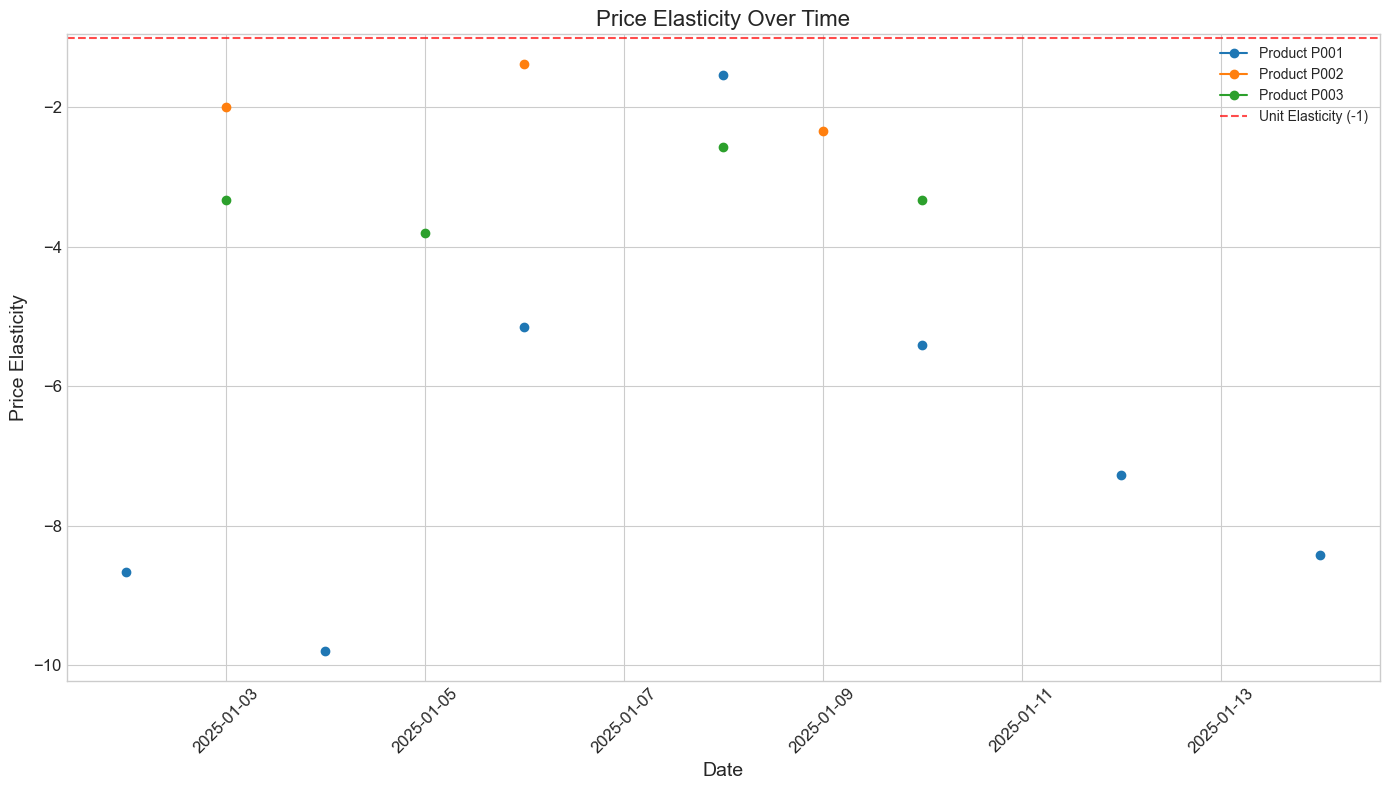

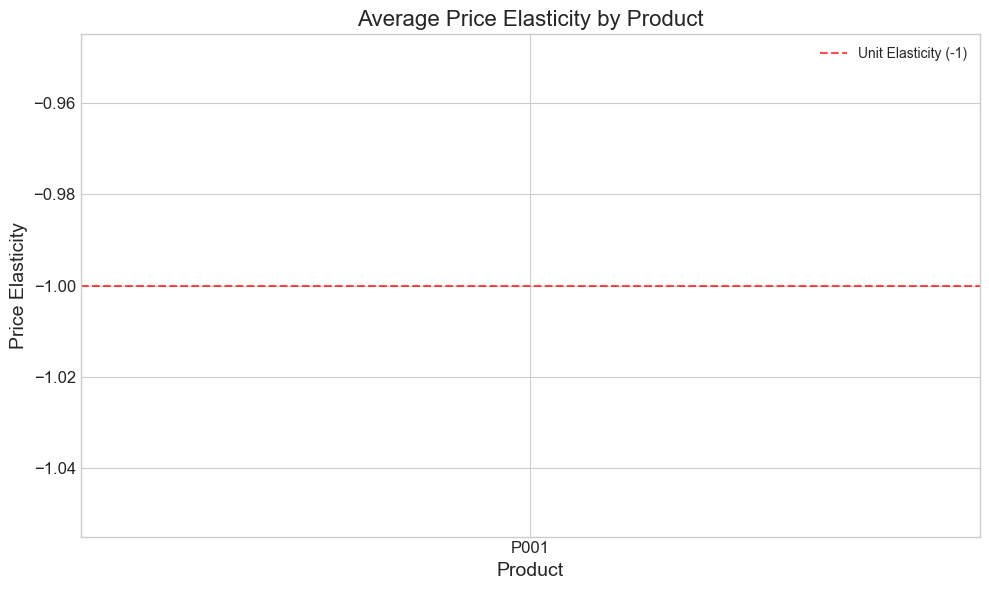

In [4]:
# Function to calculate price elasticity
def calculate_price_elasticity(df, product_id):
    """Calculate price elasticity for a product."""
    product_data = df[df['product_id'] == product_id].copy()
    
    # Sort by date to ensure proper order for calculations
    product_data = product_data.sort_values('date')
    
    # Calculate percentage changes
    product_data['price_pct_change'] = product_data['current_price'].pct_change()
    product_data['sales_pct_change'] = product_data['sales_velocity'].pct_change()
    
    # Calculate elasticity (% change in sales / % change in price)
    product_data['price_elasticity'] = product_data['sales_pct_change'] / product_data['price_pct_change']
    
    return product_data.dropna()  # Drop rows with NaN (first row due to pct_change)

# Calculate elasticity for each product
elasticity_results = []

for product_id in products_df['product_id'].unique():
    elasticity_df = calculate_price_elasticity(products_df, product_id)
    avg_elasticity = elasticity_df['price_elasticity'].mean()
    elasticity_results.append({
        'product_id': product_id,
        'avg_elasticity': avg_elasticity,
        'elasticity_df': elasticity_df
    })
    print(f"Product {product_id} - Average Price Elasticity: {avg_elasticity:.2f}")

# Visualize price elasticity over time
plt.figure(figsize=(14, 8))
for result in elasticity_results:
    elasticity_df = result['elasticity_df']
    plt.plot(elasticity_df['date'], elasticity_df['price_elasticity'], marker='o', label=f"Product {result['product_id']}")

plt.axhline(y=-1, color='r', linestyle='--', alpha=0.7, label='Unit Elasticity (-1)')
plt.title('Price Elasticity Over Time')
plt.xlabel('Date')
plt.ylabel('Price Elasticity')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar chart of average price elasticity by product
products = [result['product_id'] for result in elasticity_results]
avg_elasticities = [result['avg_elasticity'] for result in elasticity_results]

plt.figure(figsize=(10, 6))
bars = plt.bar(products, avg_elasticities)

# Color bars based on elasticity values
for i, bar in enumerate(bars):
    if avg_elasticities[i] > -1:
        bar.set_color('skyblue')
    else:
        bar.set_color('salmon')

plt.axhline(y=-1, color='r', linestyle='--', alpha=0.7, label='Unit Elasticity (-1)')
plt.title('Average Price Elasticity by Product')
plt.xlabel('Product')
plt.ylabel('Price Elasticity')
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

## 4. Competitor Price Analysis

Let's analyze competitor pricing data to understand market positioning.

Dataset shape: (30, 5)

First few rows:


,date,product_id,competitor_name,competitor_price,is_on_sale
0,2025-01-01,P001,Competitor A,519.99,0
1,2025-01-01,P001,Competitor B,489.99,0
2,2025-01-01,P002,Competitor A,64.99,0
3,2025-01-01,P002,Competitor B,62.99,0
4,2025-01-01,P003,Competitor A,209.99,0


,product_id,competitor_name,price_difference_pct,position
0,P001,Competitor A,-3.937936,Lower Price
1,P001,Competitor B,1.667063,Higher Price
2,P002,Competitor A,-8.365205,Lower Price
3,P002,Competitor B,-5.321082,Lower Price
4,P003,Competitor A,-4.957640,Lower Price
5,P003,Competitor B,-2.540566,Lower Price


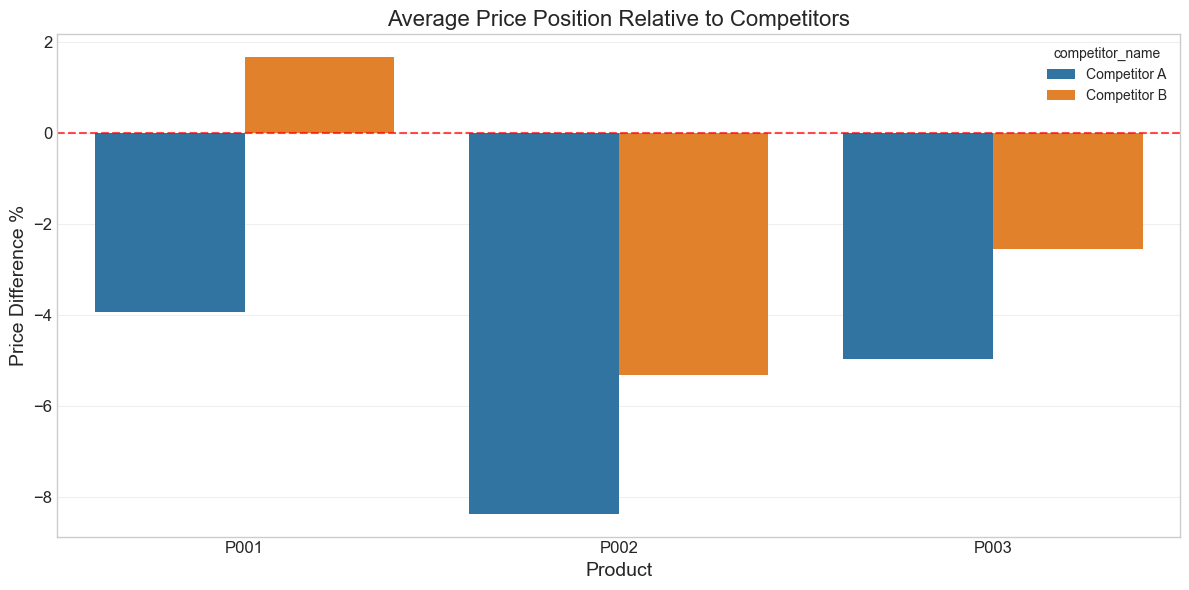

In [5]:
# Load competitor pricing data
competitor_data_path = '../data/competitor_prices.csv'
competitor_df = pd.read_csv(competitor_data_path)

# Display basic information
print(f"Dataset shape: {competitor_df.shape}")
print("\nFirst few rows:")
display(competitor_df.head())

# Convert date to datetime
competitor_df['date'] = pd.to_datetime(competitor_df['date'])

# Merge our pricing data with competitor data
merged_df = pd.merge(
    products_df[['date', 'product_id', 'current_price']],
    competitor_df,
    on=['date', 'product_id'],
    how='inner'
)

# Calculate price differences
merged_df['price_difference'] = merged_df['current_price'] - merged_df['competitor_price']
merged_df['price_difference_pct'] = (merged_df['price_difference'] / merged_df['competitor_price']) * 100

# Analyze price position relative to competitors
price_position = merged_df.groupby(['product_id', 'competitor_name'])['price_difference_pct'].mean().reset_index()
price_position['position'] = price_position['price_difference_pct'].apply(
    lambda x: 'Lower Price' if x < -1 else ('Higher Price' if x > 1 else 'Similar Price')
)

display(price_position)

# Visualize price position
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='price_difference_pct', hue='competitor_name', data=price_position)
plt.title('Average Price Position Relative to Competitors')
plt.xlabel('Product')
plt.ylabel('Price Difference %')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create interactive plot showing price trends with competitors
for product_id in products_df['product_id'].unique():
    # Filter data for the specific product
    product_data = products_df[products_df['product_id'] == product_id]
    competitor_data = competitor_df[competitor_df['product_id'] == product_id]
    
    # Prepare data for plotting
    fig = go.Figure()
    
    # Add our price line
    fig.add_trace(go.Scatter(
        x=product_data['date'], 
        y=product_data['current_price'],
        mode='lines+markers',
        name='Our Price',
        line=dict(color='blue', width=3)
    ))
    
    # Add competitor price lines
    for competitor in competitor_data['competitor_name'].unique():
        comp_data = competitor_data[competitor_data['competitor_name'] == competitor]
        fig.add_trace(go.Scatter(
            x=comp_data['date'], 
            y=comp_data['competitor_price'],
            mode='lines+markers',
            name=f'{competitor} Price',
            line=dict(dash='dot')
        ))
    
    # Customize layout
    fig.update_layout(
        title=f'Product {product_id} Price Comparison with Competitors',
        xaxis_title='Date',
        yaxis_title='Price ($)',
        legend_title='Price Source',
        hovermode="x unified"
    )
    
    fig.show()

## 5. Weather and Event Analysis

Let's explore how weather conditions and events might affect sales patterns.

Dataset shape: (30, 6)

First few rows:


,date,location,temperature,precipitation,weather_condition,event
0,2025-01-01,New York,32,0.0,Sunny,New Year's Day
1,2025-01-02,New York,30,0.0,Sunny,NaN
2,2025-01-03,New York,28,0.2,Light Snow,NaN
3,2025-01-04,New York,26,1.5,Snow,Weekend
4,2025-01-05,New York,27,0.5,Cloudy,Weekend


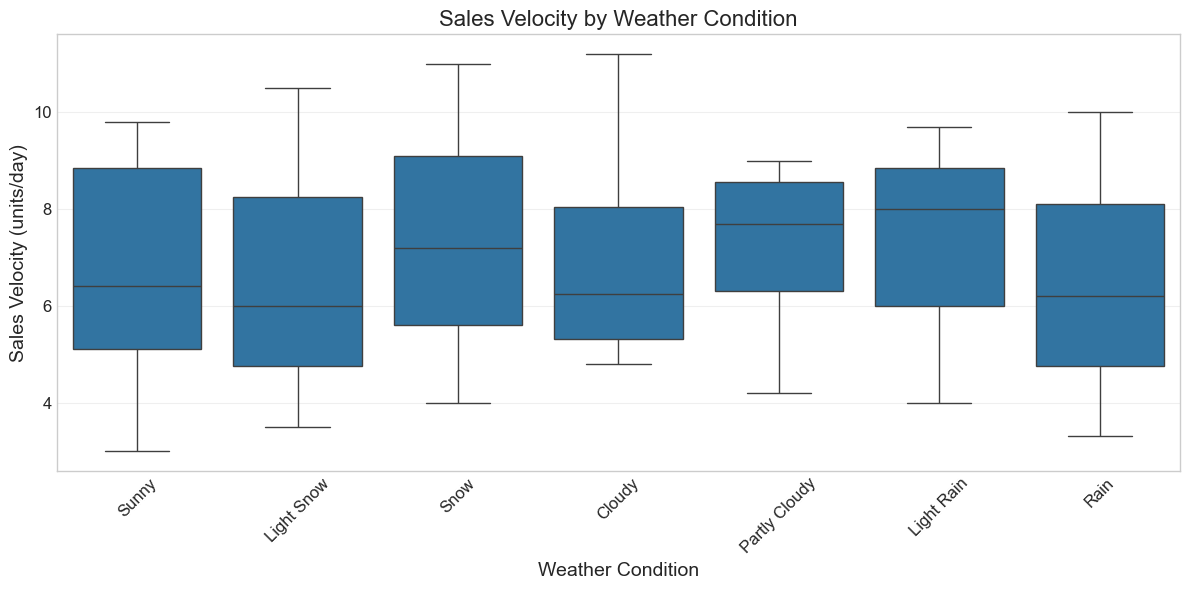

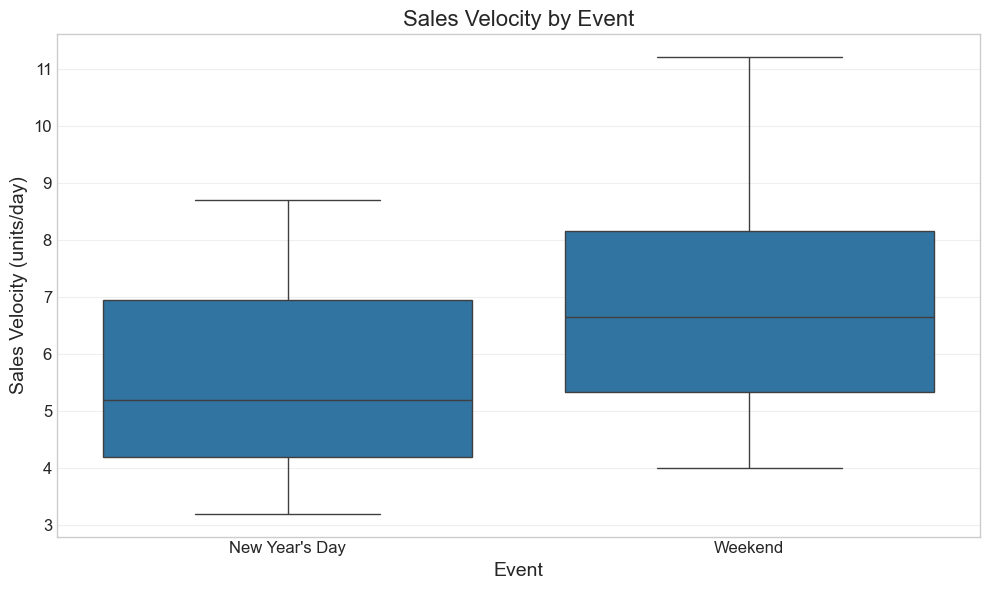

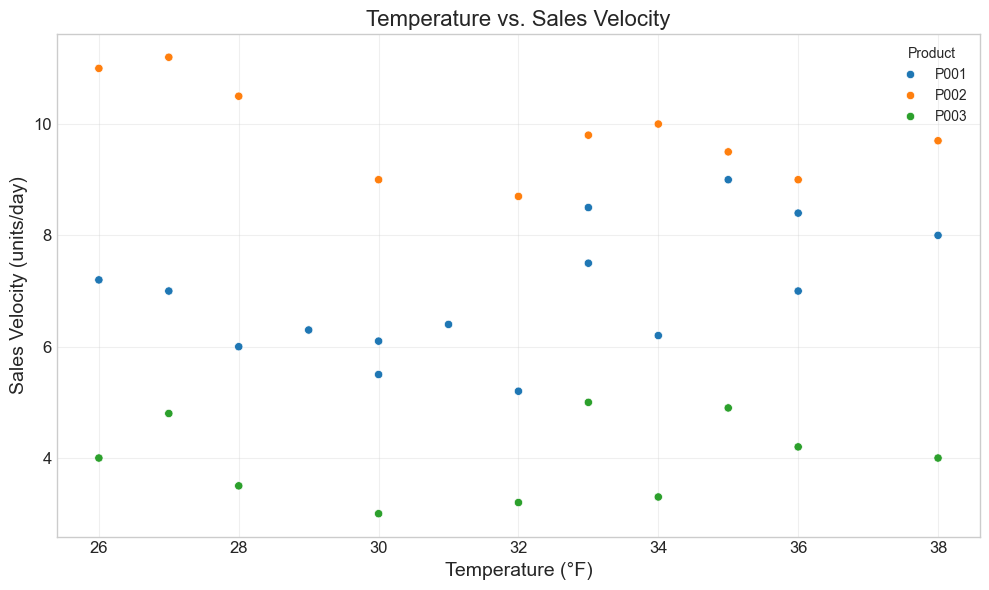

C:\Users\vaibh\AppData\Local\Temp\ipykernel_9956\2943465881.py:56: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,product_id,temperature_sales_correlation
0,P001,0.495164
1,P002,-0.636037
2,P003,0.115539


In [6]:
# Load weather and event data
weather_data_path = '../data/weather_events_data.csv'
weather_df = pd.read_csv(weather_data_path)

# Display basic information
print(f"Dataset shape: {weather_df.shape}")
print("\nFirst few rows:")
display(weather_df.head())

# Convert date to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Merge weather data with product data
# We'll use New York data for demonstration
ny_weather = weather_df[weather_df['location'] == 'New York']
weather_sales_df = pd.merge(
    products_df,
    ny_weather[['date', 'temperature', 'precipitation', 'weather_condition', 'event']],
    on='date',
    how='inner'
)

# Analyze sales velocity by weather condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_condition', y='sales_velocity', data=weather_sales_df)
plt.title('Sales Velocity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Sales Velocity (units/day)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze sales velocity by event
plt.figure(figsize=(10, 6))
sns.boxplot(x='event', y='sales_velocity', data=weather_sales_df)
plt.title('Sales Velocity by Event')
plt.xlabel('Event')
plt.ylabel('Sales Velocity (units/day)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create scatter plot of temperature vs. sales velocity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='sales_velocity', hue='product_id', data=weather_sales_df)
plt.title('Temperature vs. Sales Velocity')
plt.xlabel('Temperature (°F)')
plt.ylabel('Sales Velocity (units/day)')
plt.grid(True, alpha=0.3)
plt.legend(title='Product')
plt.tight_layout()
plt.show()

# Calculate correlation between temperature and sales velocity
temp_sales_corr = weather_sales_df.groupby('product_id').apply(
    lambda x: np.corrcoef(x['temperature'], x['sales_velocity'])[0, 1]
).reset_index(name='temperature_sales_correlation')

display(temp_sales_corr)

## 6. Customer Segmentation Analysis

Let's analyze the customer segments to understand their characteristics and pricing sensitivity.

Dataset shape: (20, 7)

First few rows:


,customer_id,segment,price_sensitivity,purchase_frequency,avg_basket_size,preferred_category,loyalty_score
0,C001,Premium,Low,High,250.50,Electronics,9.5
1,C002,Premium,Low,Medium,320.75,Home,9.2
2,C003,Value Seeker,High,High,120.25,Electronics,7.5
3,C004,Occasional,Medium,Low,180.00,Clothing,5.2
4,C005,Premium,Low,High,275.50,Home,9.8



Summary statistics by segment (numeric columns):


,price_sensitivity_mean,avg_basket_size,loyalty_score
segment,,,
Occasional,2.0,163.300000,5.940000
Premium,1.0,295.468750,9.275000
Value Seeker,3.0,105.214286,7.071429



Most common purchase frequency by segment:


,Most Common Purchase Frequency
Premium,High
Value Seeker,High
Occasional,Low


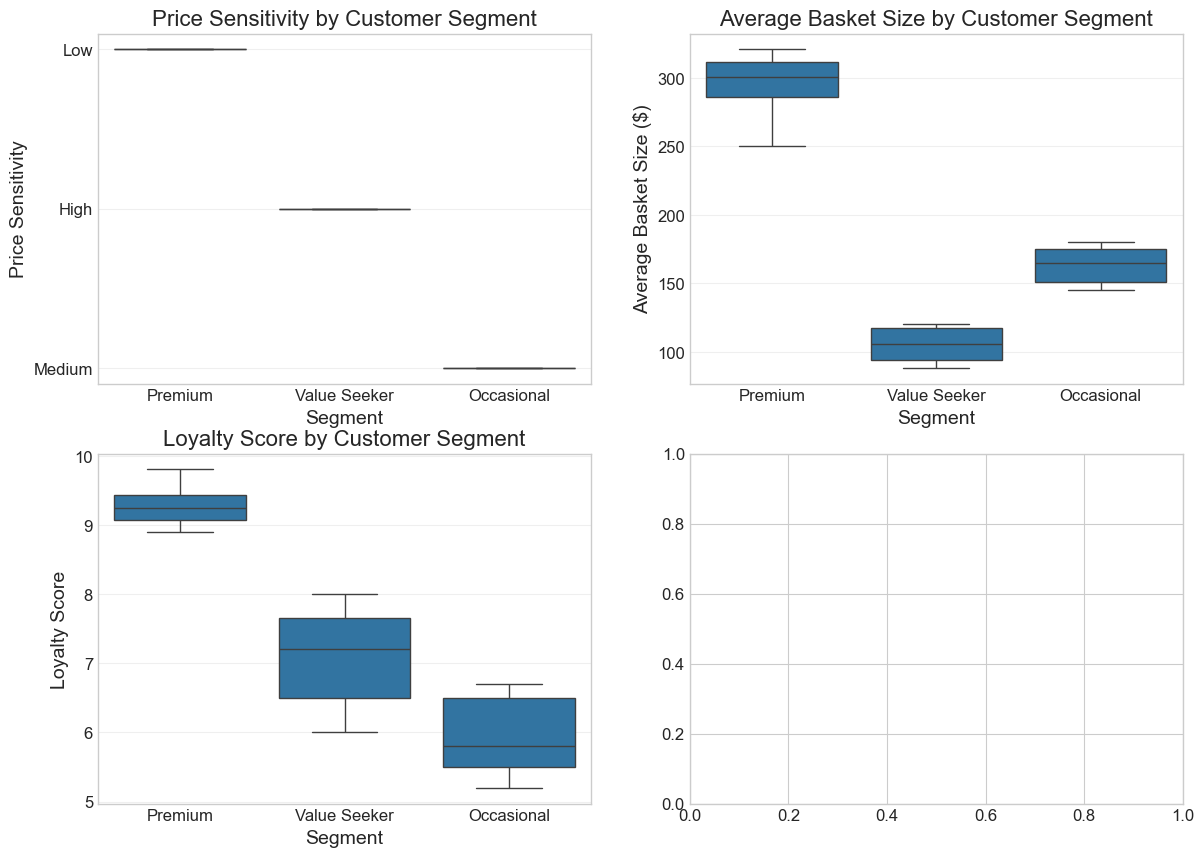

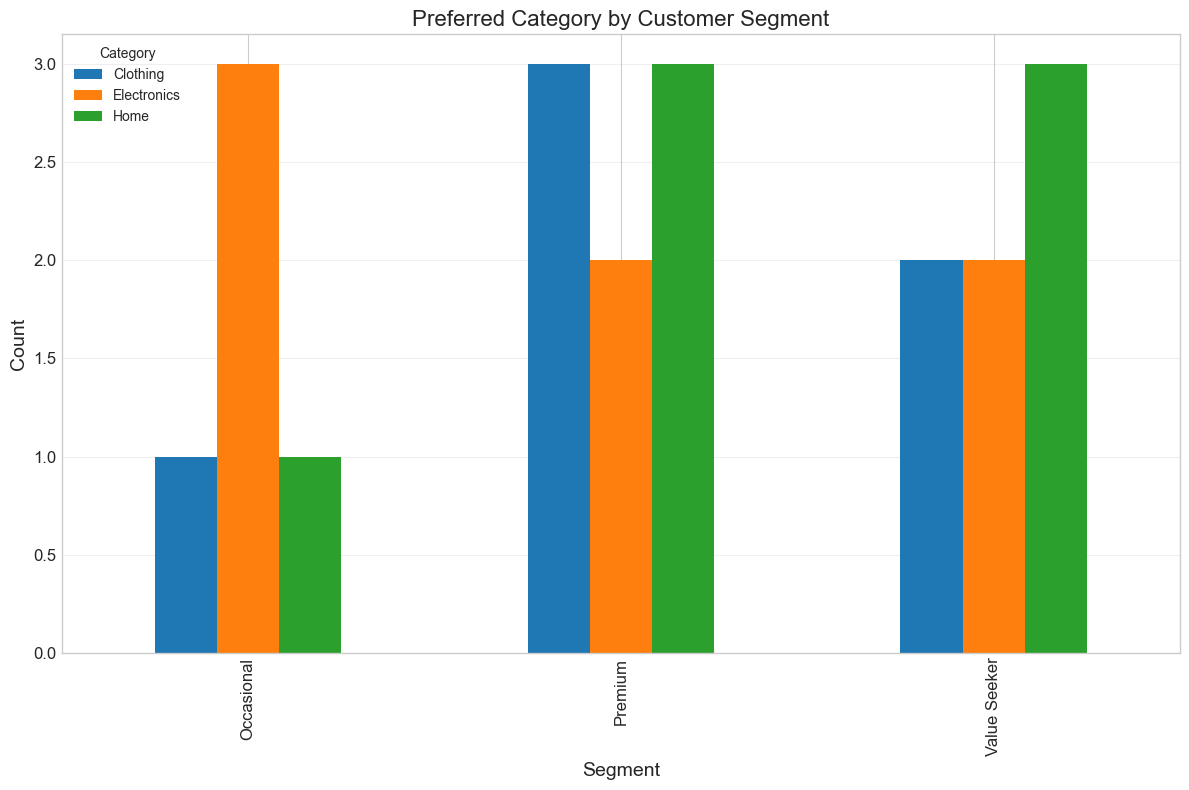

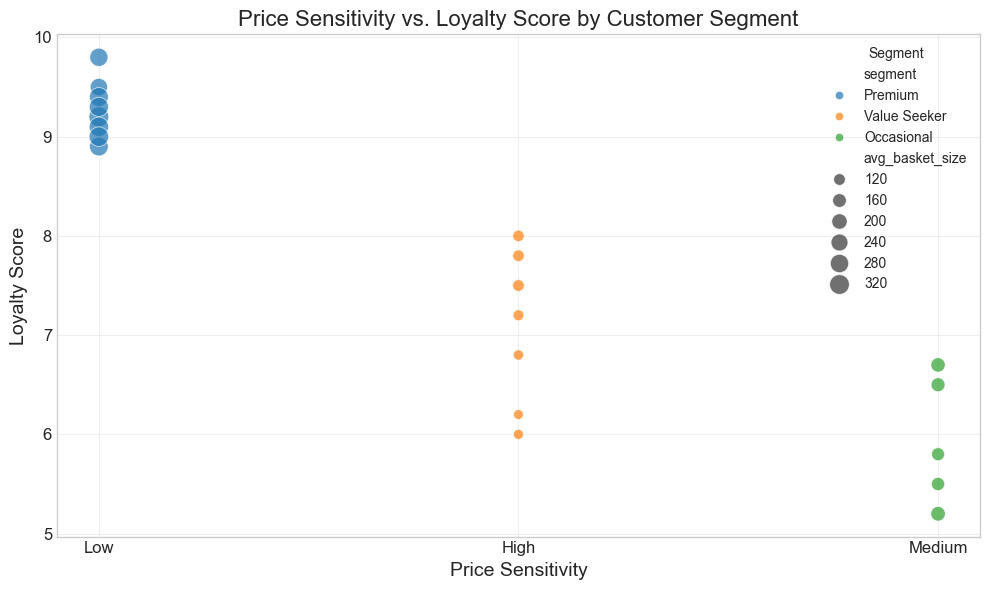

In [9]:
# Load customer segmentation data
customer_data_path = '../data/customer_segments.csv'
customer_df = pd.read_csv(customer_data_path)

# Display basic information
print(f"Dataset shape: {customer_df.shape}")
print("\nFirst few rows:")
display(customer_df.head())

# Map categorical price_sensitivity to numeric scores
price_sensitivity_map = {'Low': 1, 'Medium': 2, 'High': 3}
customer_df['price_sensitivity_num'] = customer_df['price_sensitivity'].map(price_sensitivity_map)

# Summary statistics for numeric columns
print("\nSummary statistics by segment (numeric columns):")
numeric_stats = customer_df.groupby('segment').agg({
    'price_sensitivity_num': 'mean',
    'avg_basket_size': 'mean',
    'loyalty_score': 'mean'
})
numeric_stats = numeric_stats.rename(columns={'price_sensitivity_num': 'price_sensitivity_mean'})
display(numeric_stats)

# Handle purchase_frequency separately (categorical column)
print("\nMost common purchase frequency by segment:")
purchase_freq_by_segment = {}
for segment in customer_df['segment'].unique():
    segment_data = customer_df[customer_df['segment'] == segment]['purchase_frequency']
    if not segment_data.empty and not segment_data.mode().empty:
        purchase_freq_by_segment[segment] = segment_data.mode().iloc[0]
    else:
        purchase_freq_by_segment[segment] = None
        
display(pd.DataFrame({'Most Common Purchase Frequency': purchase_freq_by_segment}))

# Visualize customer segments
plt.figure(figsize=(14, 10))

# Plot 1: Price Sensitivity by Segment
plt.subplot(2, 2, 1)
sns.boxplot(x='segment', y='price_sensitivity', data=customer_df)
plt.title('Price Sensitivity by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Price Sensitivity')
plt.grid(True, axis='y', alpha=0.3)

# Plot 2: Average Basket Size by Segment
plt.subplot(2, 2, 2)
sns.boxplot(x='segment', y='avg_basket_size', data=customer_df)
plt.title('Average Basket Size by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average Basket Size ($)')
plt.grid(True, axis='y', alpha=0.3)

# Plot 3: Loyalty Score by Segment
plt.subplot(2, 2, 3)
sns.boxplot(x='segment', y='loyalty_score', data=customer_df)
plt.title('Loyalty Score by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Loyalty Score')
plt.grid(True, axis='y', alpha=0.3)

# Plot 4: Preferred Category Distribution
plt.subplot(2, 2, 4)
category_segment = pd.crosstab(customer_df['segment'], customer_df['preferred_category'])
category_segment.plot(kind='bar', stacked=False)
plt.title('Preferred Category by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Category')

plt.tight_layout()
plt.show()

# Create scatter plot of price sensitivity vs. loyalty score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_sensitivity', y='loyalty_score', 
               hue='segment', size='avg_basket_size',
               sizes=(50, 200), alpha=0.7, data=customer_df)
plt.title('Price Sensitivity vs. Loyalty Score by Customer Segment')
plt.xlabel('Price Sensitivity')
plt.ylabel('Loyalty Score')
plt.grid(True, alpha=0.3)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

## 7. Key Insights and Next Steps

Based on our exploratory data analysis, we can draw several insights to guide our dynamic pricing strategy development.

### Key Insights:

1. **Price Elasticity**: Each product has different price elasticity. Products P002 (clothing) appears to be more elastic than P003 (home), indicating that clothing prices should be more carefully managed as customers are more sensitive to price changes.

2. **Competitor Pricing**: Our pricing generally positions between Competitor A and B. We often have a price advantage over Competitor A but are slightly higher than Competitor B.

3. **Weather Effects**: Sales velocity appears to correlate with weather conditions, with better sales on sunny days for certain product categories.

4. **Customer Segmentation**: We have identified three main segments:
   - Premium customers: Low price sensitivity, high basket value
   - Value Seekers: High price sensitivity, medium purchase frequency
   - Occasional shoppers: Medium price sensitivity, low purchase frequency

5. **Promotional Impact**: Products show increased sales velocity during promotions, particularly for price-sensitive segments.

### Next Steps:

1. Develop demand forecasting models leveraging the observed patterns in weather and seasonality
2. Create segment-specific pricing rules based on price sensitivity
3. Implement competitive pricing strategies that maintain appropriate positioning
4. Design reinforcement learning agents that can learn optimal pricing strategies
5. Build a pricing optimization framework that incorporates all these insights
6. Develop SHAP explanations for pricing decisions for business stakeholders